## Covaraince Bias Correction Testing

In [123]:
import os
import glob
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import pandas as pd
import seaborn as sns
import tqdm

from cvtk.cov import temporal_cov, calc_deltas
from cvtk.wfsim import wright_fisher, wright_fisher_sample, sample_depth, param_grid

In [125]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
mpl.rcParams['figure.figsize'] = (8.0, 4.0)
mpl.rcParams['figure.dpi'] = 201
#plt.style.use('buffalo.mplstyle')

In [126]:
def relative_error(estimate, real):
    return 100. * (real - estimate) / real

In [127]:
def benchmark_covariances(grid):
    for params in tqdm.tqdm_notebook(grid):
        pop_freqs, sample_freqs, counts, depths = wright_fisher_sample(**params)
        pop_covs = temporal_cov(pop_freqs)
        use_correction = params.get('bias_correction', True)
        sample_covs = temporal_cov(sample_freqs, depths=depths, diploids=None, bias_correction=use_correction)
        params['pop_cov'] = pop_covs
        params['sample_cov'] = sample_covs
        params['norm'] = np.linalg.norm(pop_covs - sample_covs)
        params['pop_Ne'] = 0.5 / np.diag(pop_covs).mean()
        params['sample_Ne'] = 0.5 / np.diag(sample_covs).mean()    
        params['rel_error_Ne'] = relative_error(params['sample_Ne'], params['N'])
        params['rel_error_Ne_pop'] = relative_error(params['pop_Ne'], params['N'])
    return grid

## Constant Depth

In [138]:
constant_depth_grid = param_grid(**dict(
    ngens=[10],
    L=[50000],
    bias_correction=[True, False],
    poisson=[False],
    rep=np.arange(5), 
    N=[1e2, 1e3, 1e4, 1e5],
    depth=[50, 100, 250, 500]))

constant_depth_grid = benchmark_covariances(constant_depth_grid)

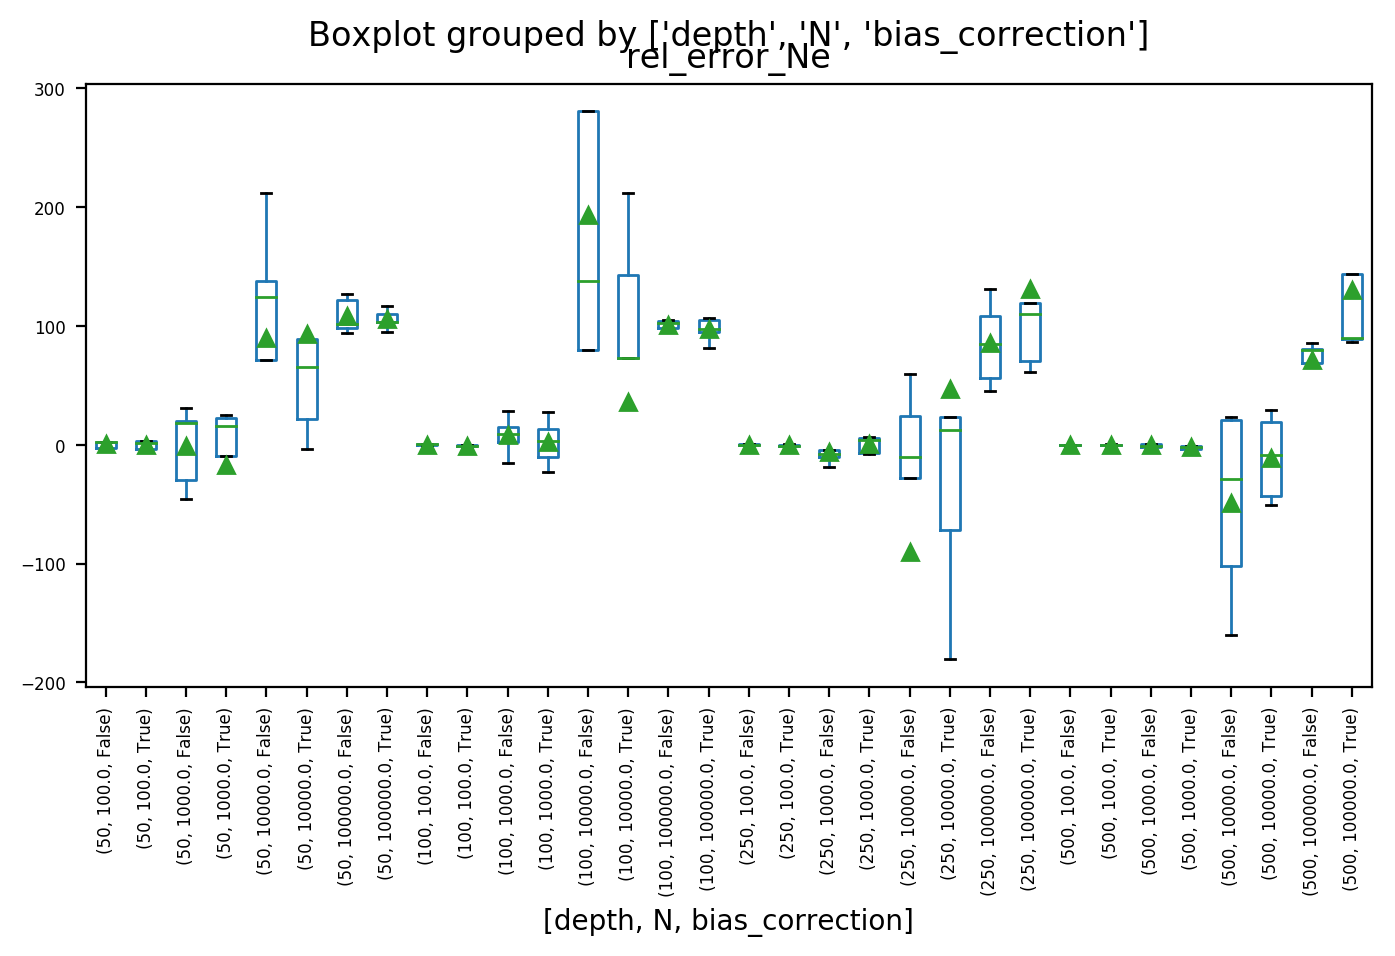

In [139]:
constant_depth = pd.DataFrame(constant_depth_grid)
constant_depth.boxplot('rel_error_Ne', by=['depth', 'N', 'bias_correction'], showmeans=True, grid=False, rot=90, fontsize=6, showfliers=False)

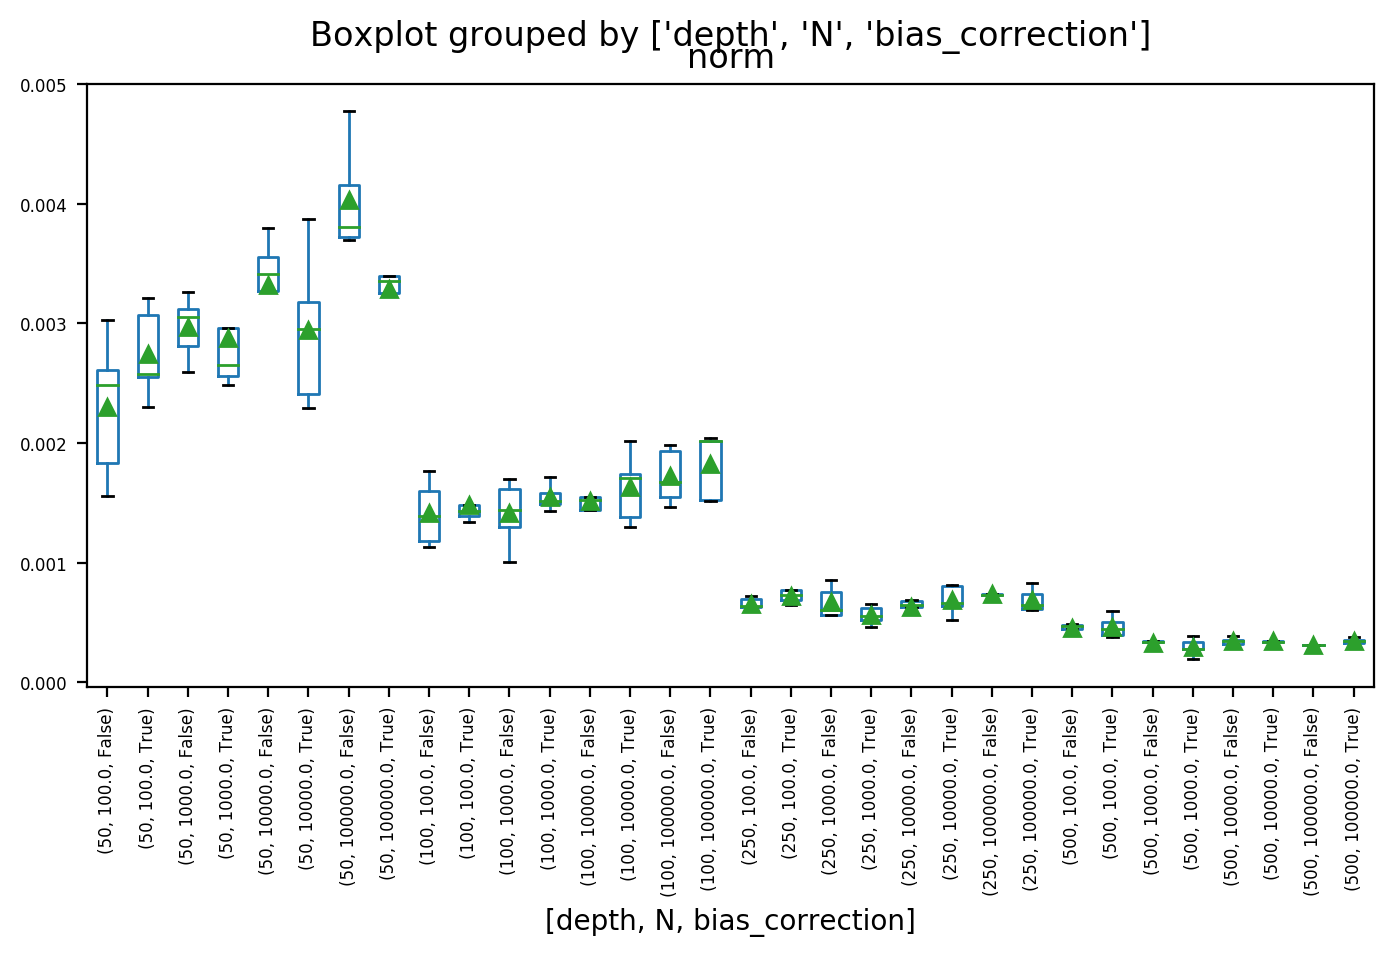

In [143]:
constant_depth.boxplot('norm', by=['depth', 'N', 'bias_correction'], showmeans=True, grid=False, rot=90, fontsize=6, showfliers=False)

## Variable Depth

In [146]:
variable_depth_grid = param_grid(**dict(
    ngens=[10],
    L=[50000],
    bias_correction=[True, False],
    poisson=[True],
    rep=np.arange(5), 
    N=[1e2, 1e3, 1e4, 1e5],
    depth=[50, 100, 250, 500]))

variable_depth_grid = benchmark_covariances(variable_depth_grid)

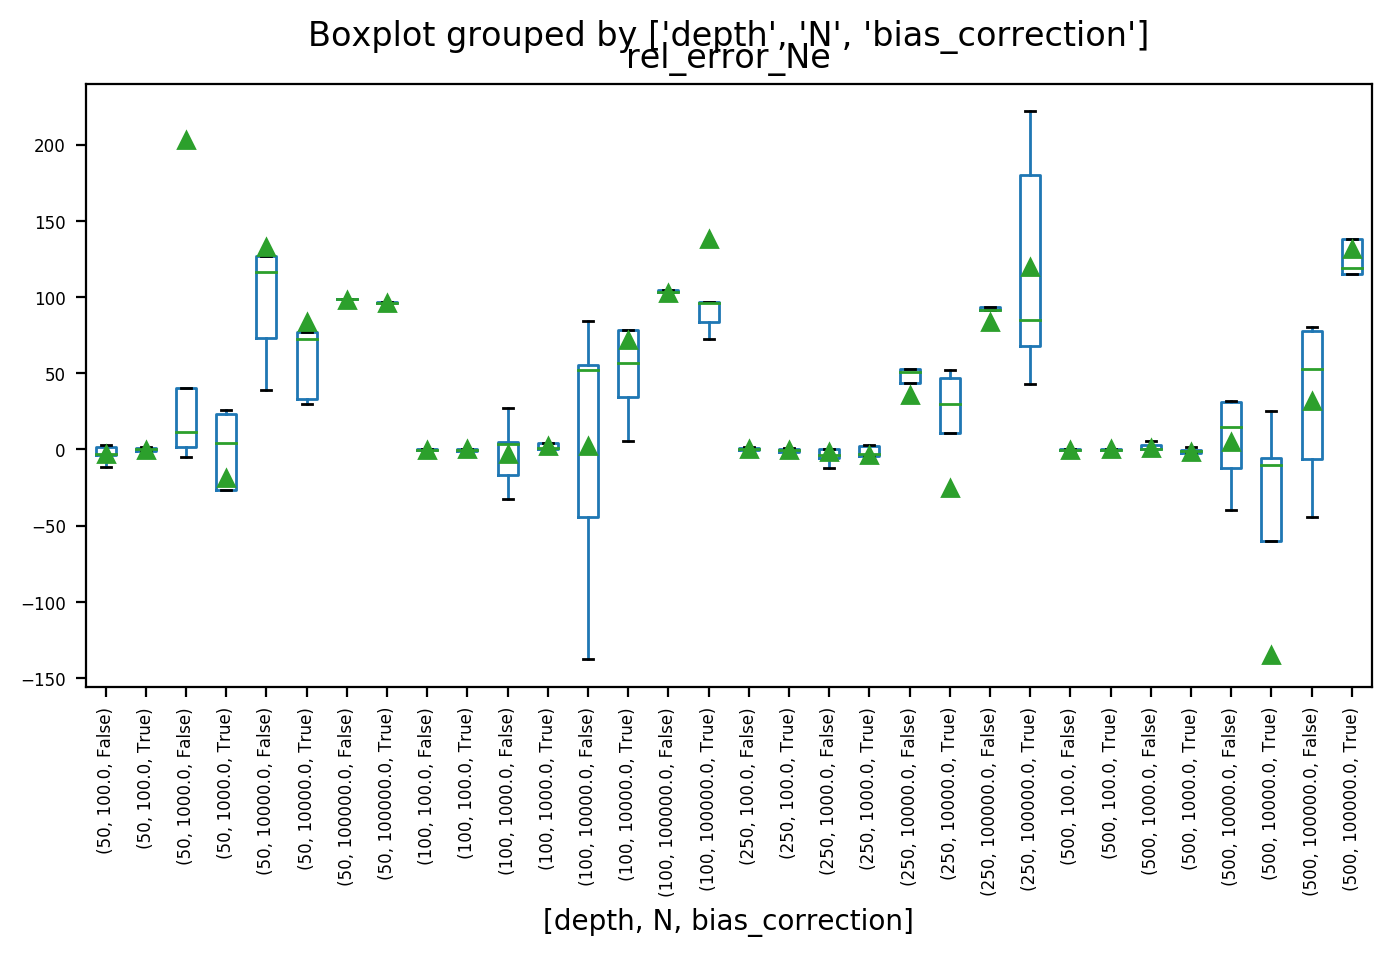

In [149]:
variable_depth = pd.DataFrame(variable_depth_grid)
variable_depth.boxplot('rel_error_Ne', by=['depth', 'N', 'bias_correction'], showmeans=True, grid=False, rot=90, fontsize=6, showfliers=False)

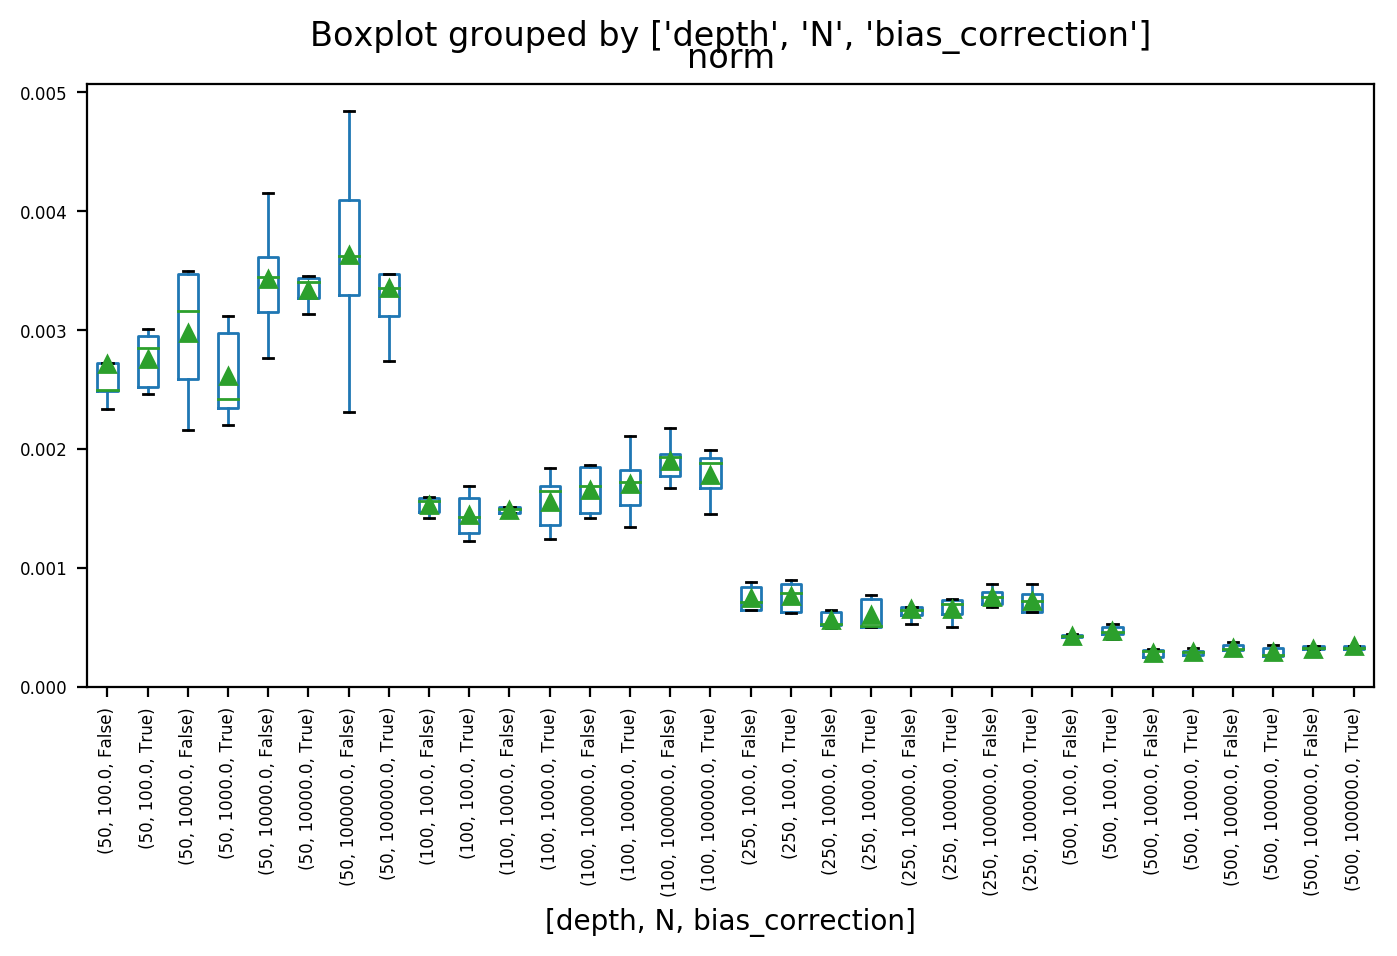

In [150]:
variable_depth = pd.DataFrame(variable_depth_grid)
variable_depth.boxplot('norm', by=['depth', 'N', 'bias_correction'], showmeans=True, grid=False, rot=90, fontsize=6, showfliers=False)

## Variable Depth and Diploid Sampling

In [133]:
variable_depth_diploid_grid = param_grid(**dict(
    ngens=[10],
    L=[50000],
    poisson=[True],
    rep=np.arange(5), 
    N=[1e2, 1e3, 1e4, 1e5],
    diploids=[50, 100, 250, 500],
    depth=[50, 100, 250, 500]))

variable_depth_diploid_grid = benchmark_covariances(variable_depth_diploid_grid)

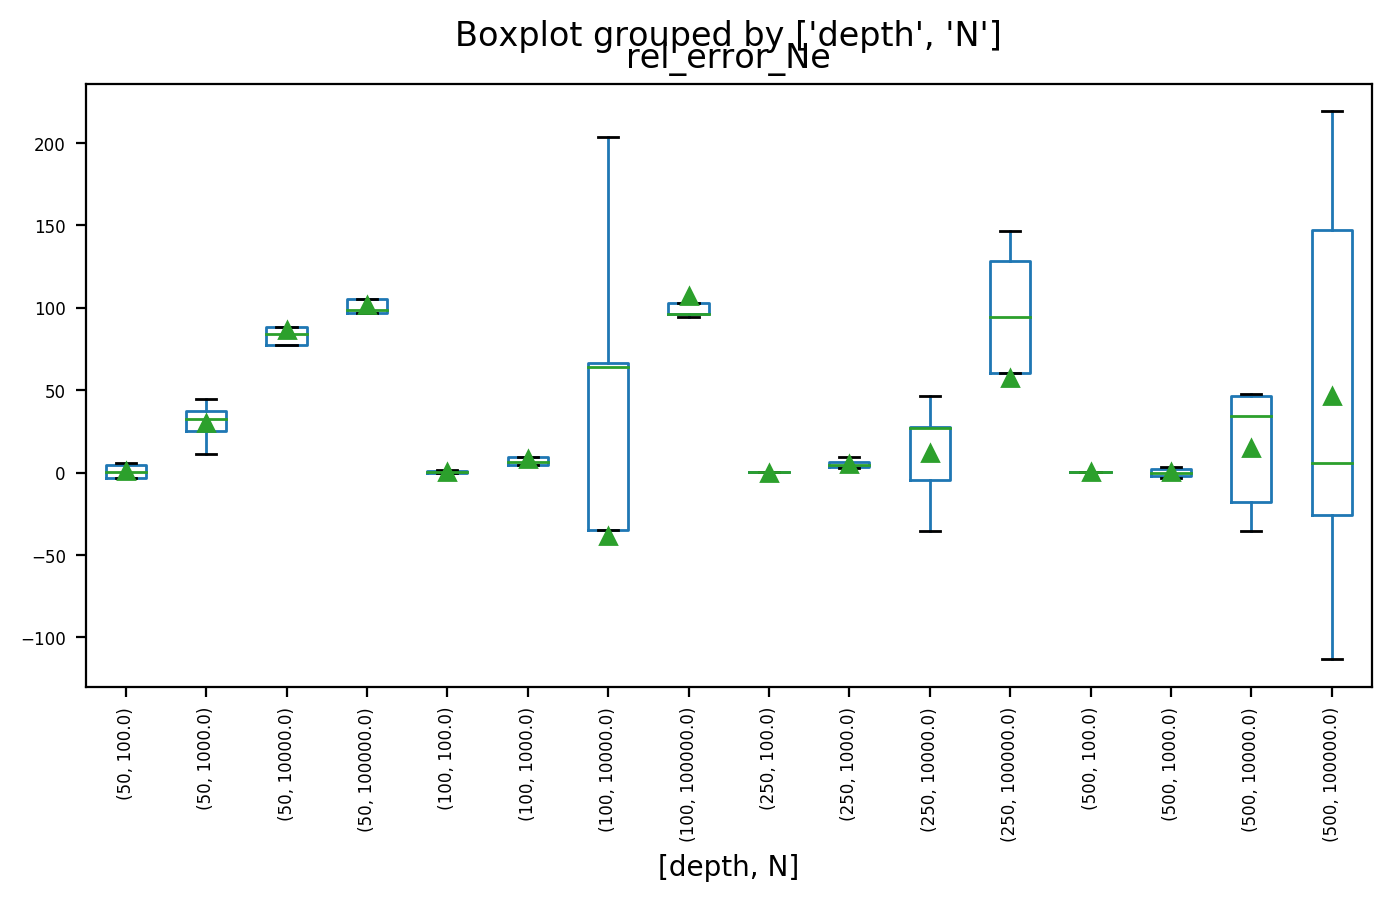

In [134]:
variable_depth_diploid = pd.DataFrame(variable_depth_grid)
variable_depth_diploid.boxplot('rel_error_Ne', by=['depth', 'N'], showmeans=True, grid=False, rot=90, fontsize=6, showfliers=False)

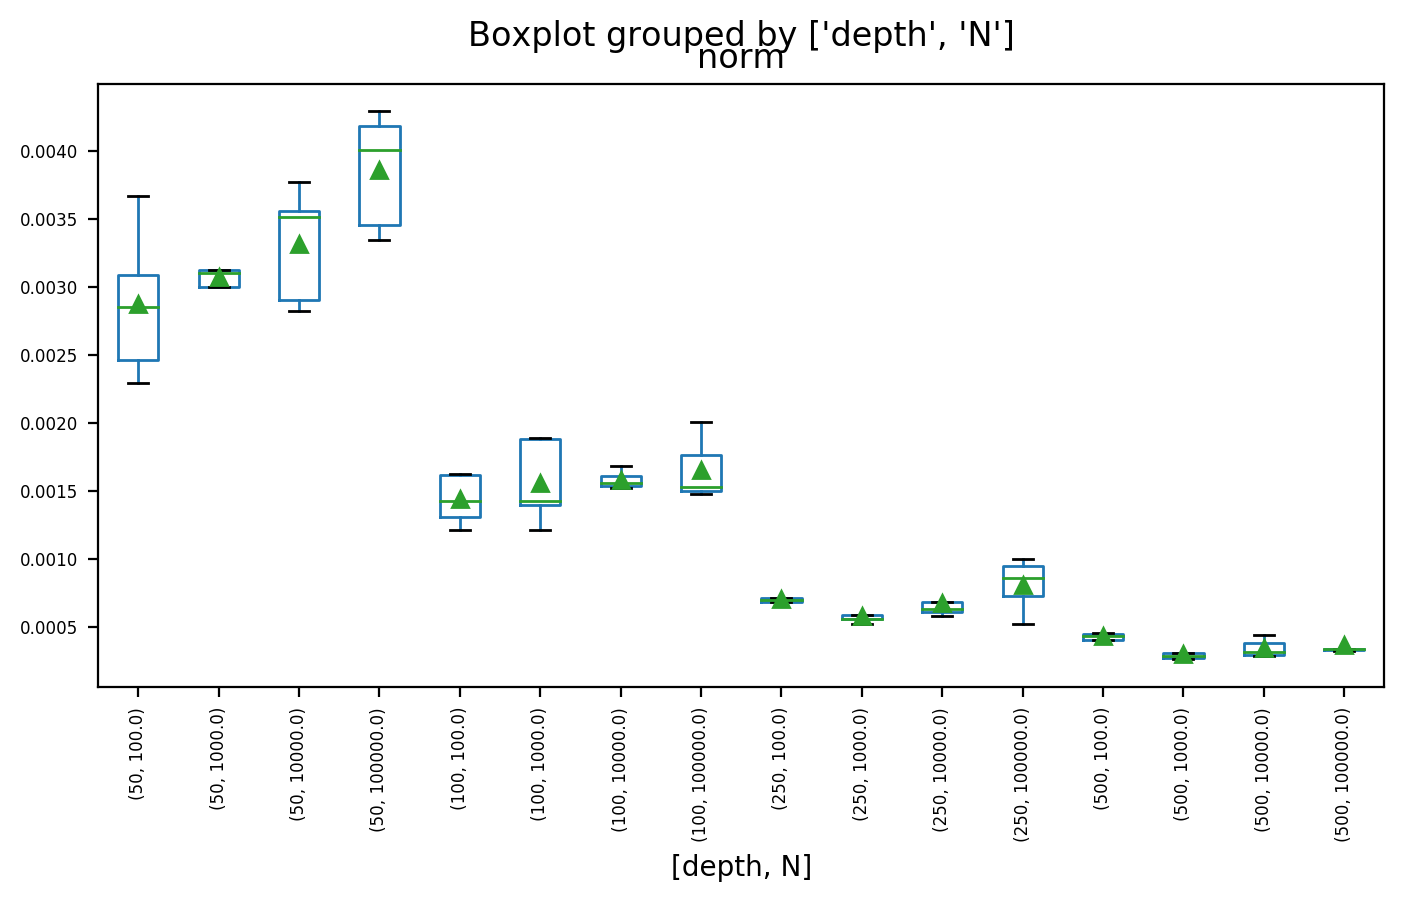

In [135]:
variable_depth_diploid.boxplot('norm', by=['depth', 'N'], showmeans=True, grid=False, rot=90, fontsize=6, showfliers=False)

In [136]:
variable_L_grid = param_grid(**dict(
    ngens=[10],
    L=[100, 1000, 10000, 100000],
    poisson=[False],
    rep=np.arange(20),
    N=[1e6],
    depth=[1000, 10000, 100000, 1000000]))

variable_L_grid = benchmark_covariances(variable_L_grid)

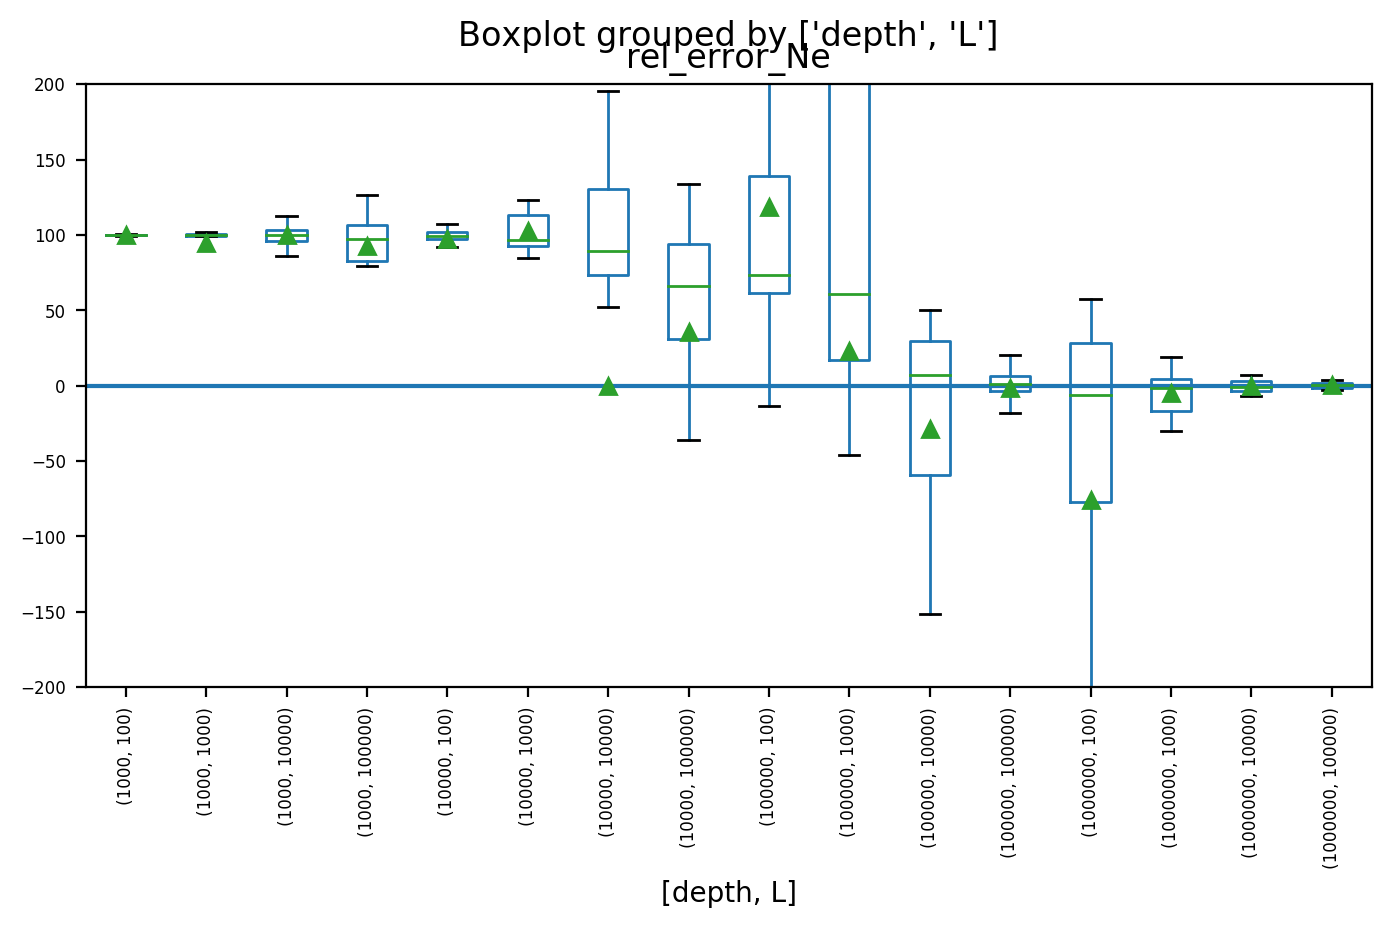

In [137]:
variable_L = pd.DataFrame(variable_L_grid)
variable_L.boxplot('rel_error_Ne', by=['depth', 'L'], showmeans=True, grid=False, rot=90, fontsize=6, showfliers=False)
plt.ylim(-200, 200)
plt.axhline(0)